In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('car_data.csv')

In [5]:
X = data[['Horsepower', 'FuelType']]
y = data['Price']

In [6]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Create a pipeline for polynomial regression with encoding categorical data
from sklearn.pipeline import Pipeline
# Use PolynomialFeatures for polynomial regression
# Use OneHotEncoder for encoding categorical data
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
# Use ColumnTransformer to handle both numerical and categorical features
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression


model = Pipeline([
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('num', PolynomialFeatures(degree=2, include_bias=False), ['Horsepower']),
            ('cat', OneHotEncoder(), ['FuelType'])
        ],
        remainder='passthrough'
    )),
    ('regressor', LinearRegression())
])


In [12]:
# Fit the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  PolynomialFeatures(include_bias=False),
                                                  ['Horsepower']),
                                                 ('cat', OneHotEncoder(),
                                                  ['FuelType'])])),
                ('regressor', LinearRegression())])

In [15]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [16]:
# Evaluate the model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1288046.2907286831


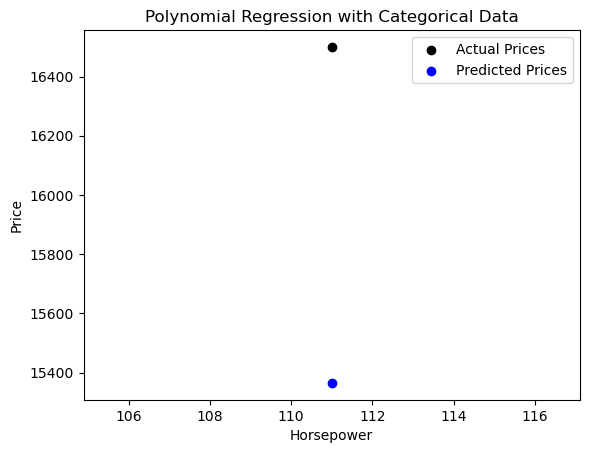

In [18]:
# Plot the results
plt.scatter(X_test['Horsepower'], y_test, color='black', label='Actual Prices')
plt.scatter(X_test['Horsepower'], y_pred, color='blue', label='Predicted Prices')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.title('Polynomial Regression with Categorical Data')
plt.legend()
plt.show()